In [730]:
from importnb import Notebook

with Notebook():
    import Step1  # Now Step1 is treated like a Python module
df=Step1.df

In [731]:
import pandas as pd
# Ajout d'une colonne goal egale a 1 si goal 0 sinon
df['goal']=df['result'].apply(lambda x: 1 if x=='goal' else 0 )
#Separation des coordonnes en 2 colonnes x,y 
df[['x', 'y']] = df['coordinates'].apply(pd.Series)

,season,gameId,eventId,period,timeInPeriod,eventType,teamId,shooter,goalie,shotType,...,powerplayAway,coordinates,result,x,y,distance,goal,distance_bins,q_bins,distance_qbins
0,20162017,2016020001,8,1,01:11,shot-on-goal,10,Mitch Marner,Craig Anderson,wrist,...,False,"(-77, 5)",no goal,-77.0,5.0,13.000000,0,"(9.999, 20.0]","(9.487, 13.601]","(9.487, 13.601]"
1,20162017,2016020001,11,1,02:53,shot-on-goal,9,Chris Kelly,Frederik Andersen,wrist,...,False,"(86, 13)",no goal,86.0,13.0,13.341664,0,"(9.999, 20.0]","(9.487, 13.601]","(9.487, 13.601]"
2,20162017,2016020001,15,1,04:01,shot-on-goal,9,Cody Ceci,Frederik Andersen,wrist,...,False,"(23, -38)",no goal,23.0,-38.0,76.157731,0,"(70.0, 80.0]","(58.694, 98.412]","(58.694, 98.412]"
3,20162017,2016020001,16,1,04:46,shot-on-goal,9,Erik Karlsson,Frederik Andersen,slap,...,False,"(33, -15)",no goal,33.0,-15.0,57.974132,0,"(50.0, 60.0]","(51.624, 58.694]","(51.624, 58.694]"
4,20162017,2016020001,24,1,06:46,shot-on-goal,10,Martin Marincin,Craig Anderson,wrist,...,False,"(-34, 28)",no goal,-34.0,28.0,61.717096,0,"(60.0, 70.0]","(58.694, 98.412]","(58.694, 98.412]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647674,20232024,2023030417,252,3,12:57,shot-on-goal,22,Zach Hyman,Sergei Bobrovsky,poke,...,False,"(85, 1)",no goal,85.0,1.0,4.123106,0,NaN,"(-0.001, 9.487]","(-0.001, 9.487]"
647675,20232024,2023030417,1183,3,14:25,shot-on-goal,13,Vladimir Tarasenko,Stuart Skinner,wrist,...,False,"(-53, -27)",no goal,-53.0,-27.0,45.000000,0,"(40.0, 50.0]","(44.283, 51.624]","(44.283, 51.624]"
647676,20232024,2023030417,1189,3,15:23,shot-on-goal,13,Aleksander Barkov,Stuart Skinner,snap,...,False,"(-59, -29)",no goal,-59.0,-29.0,41.725292,0,"(40.0, 50.0]","(38.013, 44.283]","(38.013, 44.283]"
647677,20232024,2023030417,1193,3,15:48,shot-on-goal,22,Darnell Nurse,Sergei Bobrovsky,wrist,...,False,"(57, -26)",no goal,57.0,-26.0,41.231056,0,"(40.0, 50.0]","(38.013, 44.283]","(38.013, 44.283]"


In [746]:
#Rassemble le nombre total de tir par type dans un dictionnaire
total_shots=df['shotType'].value_counts()
total_shots=total_shots.to_dict()
#Rassemble le nombre total de goal par type de tir dans un dictionnaire
goals = df[df['result'] == 'goal']['shotType'].value_counts()
goals=goals.to_dict()

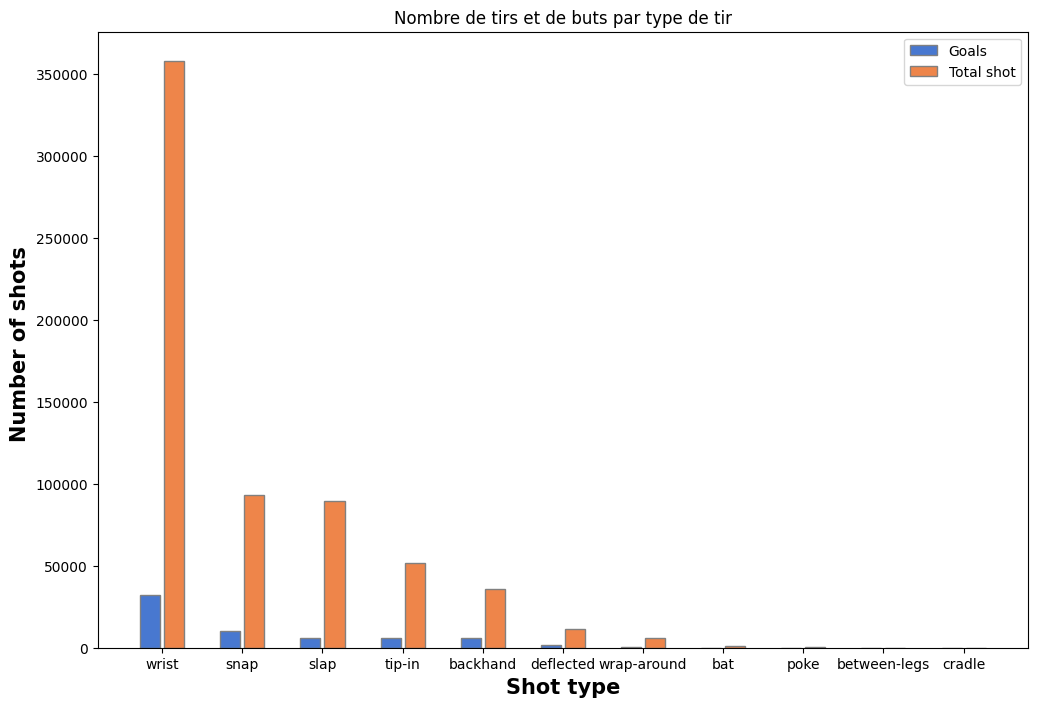

In [682]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
# Creation de la figure
fig = plt.subplots(figsize =(12, 8)) 

# Position des bars sur l'axe X
barWidth=0.3
bar =  np.arange(len(goals))
bar2 = [x + barWidth for x in bar]
colors = sns.color_palette("muted")  
# Creation des bars
#goals
plt.bar(bar, goals.values(),color =colors[0], width = 0.25, 
        edgecolor ='grey', label ='Goals') 
#total shots
plt.bar(bar2, total_shots.values(),color =colors[1], width = 0.25, 
        edgecolor ='grey', label ='Total shot')  

# Labels
plt.xlabel('Shot type', fontweight ='bold', fontsize = 15) 
plt.ylabel('Number of shots ', fontweight ='bold', fontsize = 15) 
#position des ticks et labels 
plt.xticks([r+barWidth/2 for r in range(len(goals))], goals.keys())
plt.title("Nombre de tirs et de buts par type de tir")
plt.legend()
plt.show() 

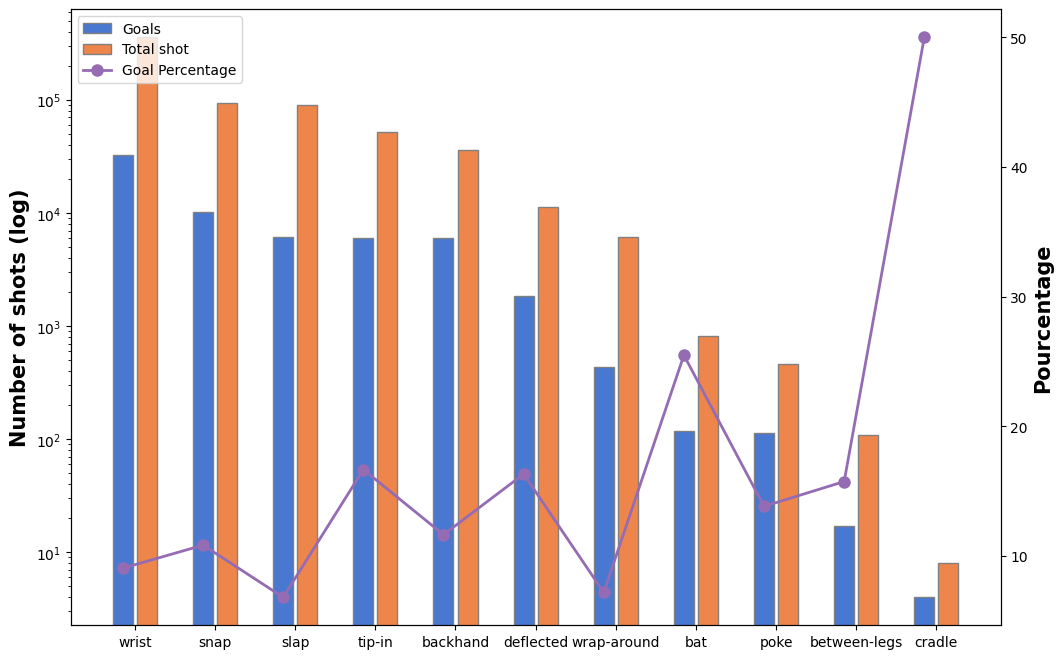

In [692]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Creation de la figure
fig,ax = plt.subplots(figsize =(12, 8)) 

# Position des bars sur l'axe X
barWidth=0.3
br1 =  np.arange(len(goals))
br2 = [x + barWidth for x in br1]
colors = sns.color_palette("muted")  
# Plot
#goal
ax.bar(br1, goals.values(),color =colors[0], width = 0.25, 
        edgecolor ='grey', label ='Goals') 
#total shot
ax.bar(br2, total_shots.values(),color =colors[1], width = 0.25, 
        edgecolor ='grey', label ='Total shot')  
#Positionnement de pourcentage sur l'axe oppose
ax2=ax.twinx()
#Creation dun dict de pourcentage a partir des 2 autres dictionaires
pourcentage_but={k: goals[k]/total_shots[k] *100 for k in goals.keys()}
ax2.plot(br1, [pourcentage_but[k] for k in goals.keys()], color=colors[4], marker='o', linewidth=2, markersize=8, label='Goal Percentage')
plt.xlabel('Shot type', fontweight ='bold', fontsize = 15) 
ax.set_ylabel('Number of shots (log)', fontweight ='bold', fontsize = 15) 
#Log scale pour que ca soit plus visible
ax.set_yscale('log')
ax2.set_ylabel('Pourcentage', fontweight ='bold', fontsize = 15) 
plt.xticks([r+barWidth/2 for r in range(len(goals))], goals.keys())
#Ajout des legendes
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1+lines2,labels1+labels2)
plt.show() 

Asked Claude Sonnet 3.5 what would be a good way to plot data with the range of values of goals, I also provided him with the previous code 

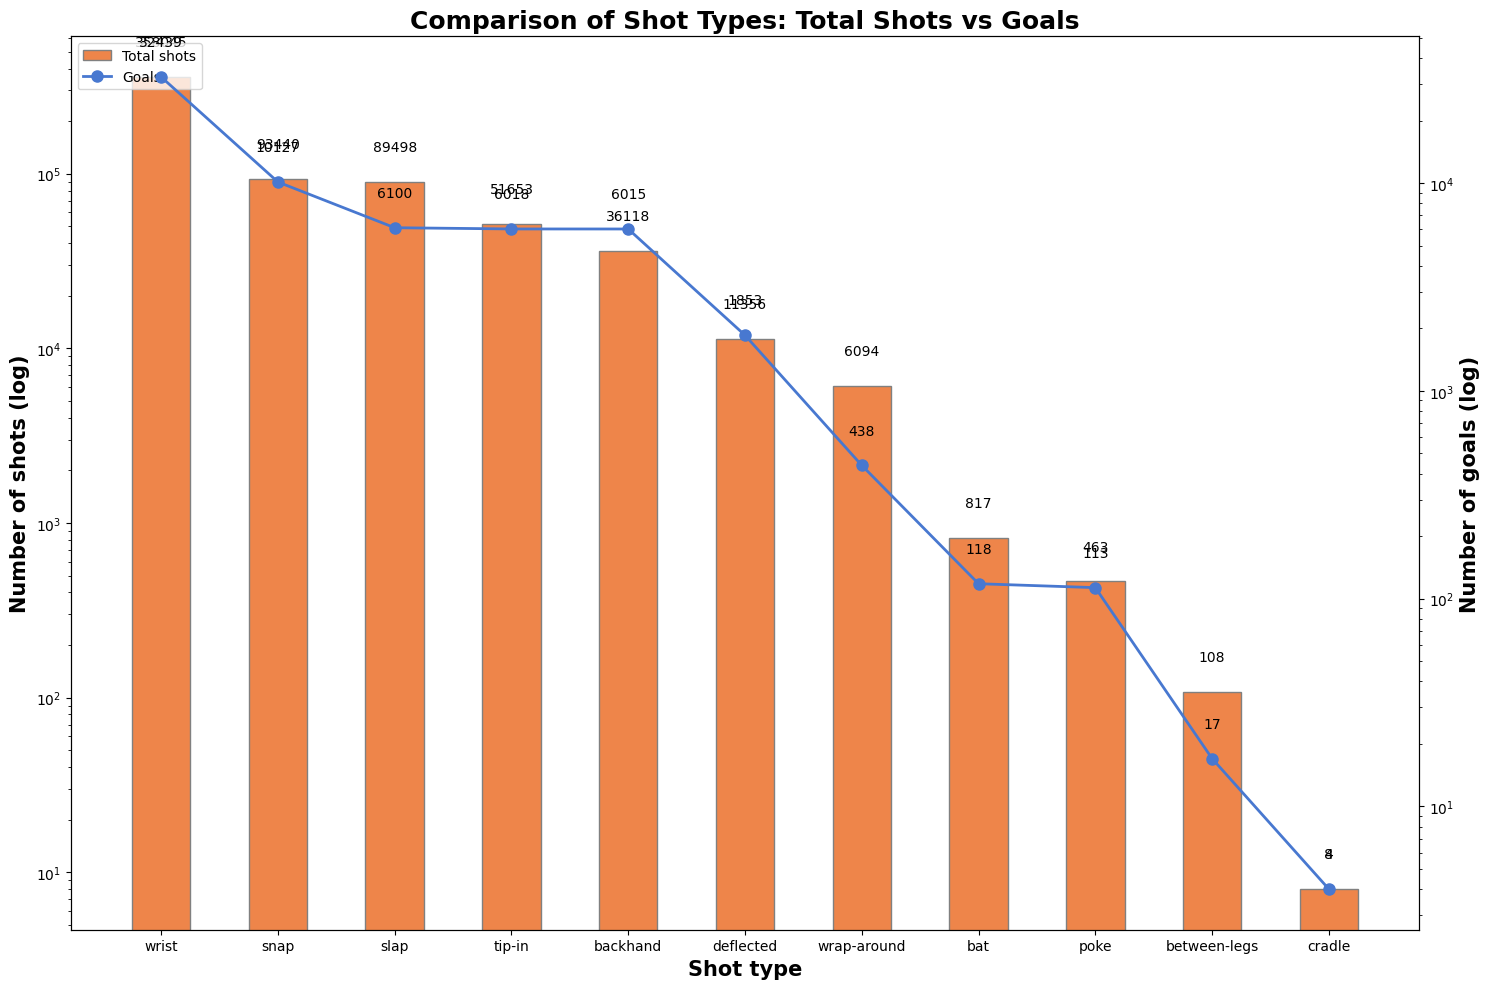

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set figure size
fig, ax1 = plt.subplots(figsize=(15, 10))

# Set position of bar on X axis 
x = np.arange(len(goals))
width = 0.5

# Colors
colors = sns.color_palette("muted")

# Plot total shots bars
bars = ax1.bar(x, total_shots.values(), width, color=colors[1], edgecolor='grey', label='Total shots')

# Create secondary y-axis for goals
ax2 = ax1.twinx()

# Plot goals line
line = ax2.plot(x, goals.values(), color=colors[0], marker='o', linewidth=2, markersize=8, label='Goals')

# Set scales to logarithmic
ax1.set_yscale('log')
ax2.set_yscale('log')

# Add value labels
for i, (shot, goal) in enumerate(zip(total_shots.values(), goals.values())):
    ax1.annotate(f'{shot}', (i, shot), xytext=(0, 20), textcoords='offset points', ha='center', va='bottom')
    ax2.annotate(f'{goal}', (i, goal), xytext=(0, 20), textcoords='offset points', ha='center', va='bottom')

# Set labels and title
ax1.set_xlabel('Shot type', fontweight='bold', fontsize=15)
ax1.set_ylabel('Number of shots (log)', fontweight='bold', fontsize=15)
ax2.set_ylabel('Number of goals (log)', fontweight='bold', fontsize=15)
plt.title('Comparison of Shot Types: Total Shots vs Goals', fontweight='bold', fontsize=18)

# Set x-ticks
plt.xticks(x, goals.keys(), rotation=45, ha='right')

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Adjust layout and display
plt.tight_layout()
plt.show()

Quelques essais

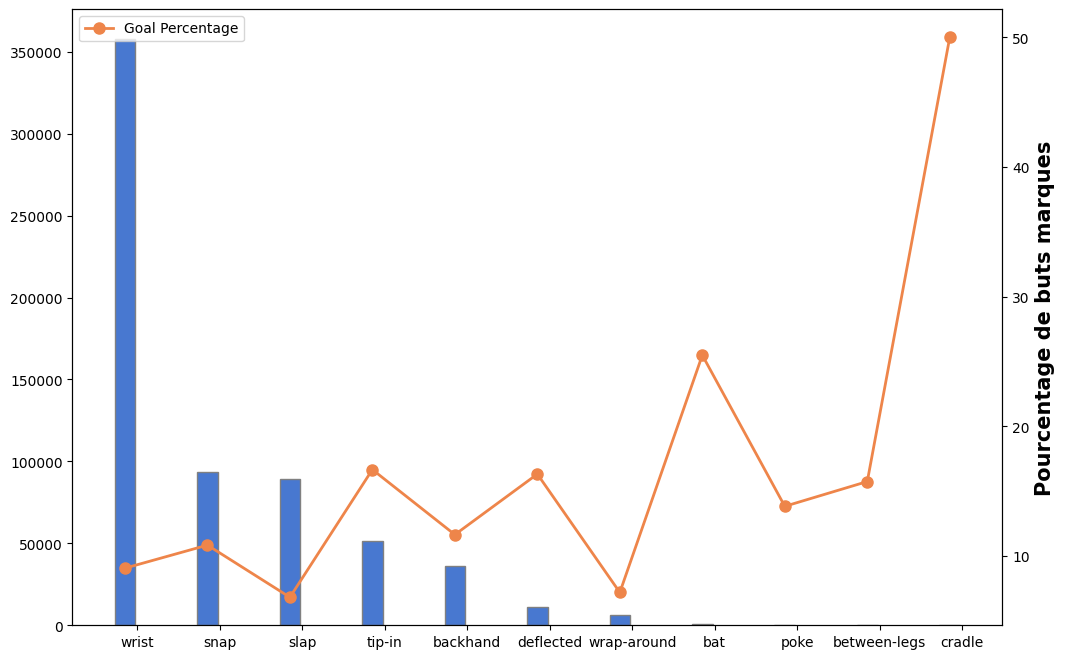

In [255]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# set width of bar 

fig,ax = plt.subplots(figsize =(12, 8)) 
# Set position of bar on X axis 
barWidth=0.3
br1 =  np.arange(len(goals))
br2 = [x + barWidth for x in br1]
colors = sns.color_palette("muted")  
# plot
ax.bar(br1, total_shots.values(),color =colors[0], width = 0.25, 
        edgecolor ='grey', label ='Nombre total de tir') 
ax2=ax.twinx()
pourcentage_but={k: goals[k]/total_shots[k] *100 for k in goals.keys()}
ax2.plot(br1, [pourcentage_but[k] for k in goals.keys()], color=colors[1], marker='o', linewidth=2, markersize=8, label='Goal Percentage')
# Ticks  
plt.xlabel('Type de tir', fontweight ='bold', fontsize = 15) 
plt.ylabel('Pourcentage de buts marques', fontweight ='bold', fontsize = 15) 
plt.xticks([r+barWidth/2 for r in range(len(goals))], goals.keys())
plt.legend()
plt.show() 

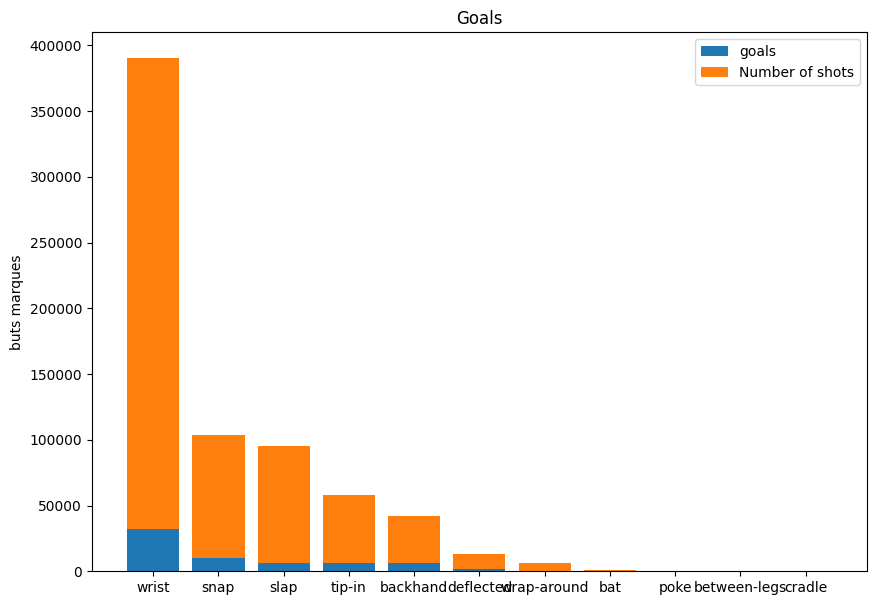

In [237]:

fig,ax1 = plt.subplots(figsize =(10, 7))
space=np.arange(len(total_shots))
p1 = ax1.bar(space,total_shots.values())
p2 = ax1.bar(space, total_shots.values(),
             bottom =goals.values())
plt.ylabel('buts marques')
plt.title('Goals')
plt.xticks(space, goals.keys())
plt.legend((p1[0], p2[0]), ('goals', 'Number of shots'))
plt.show()

Separation des dictionnaires en 2 pour creer 2 sous figures

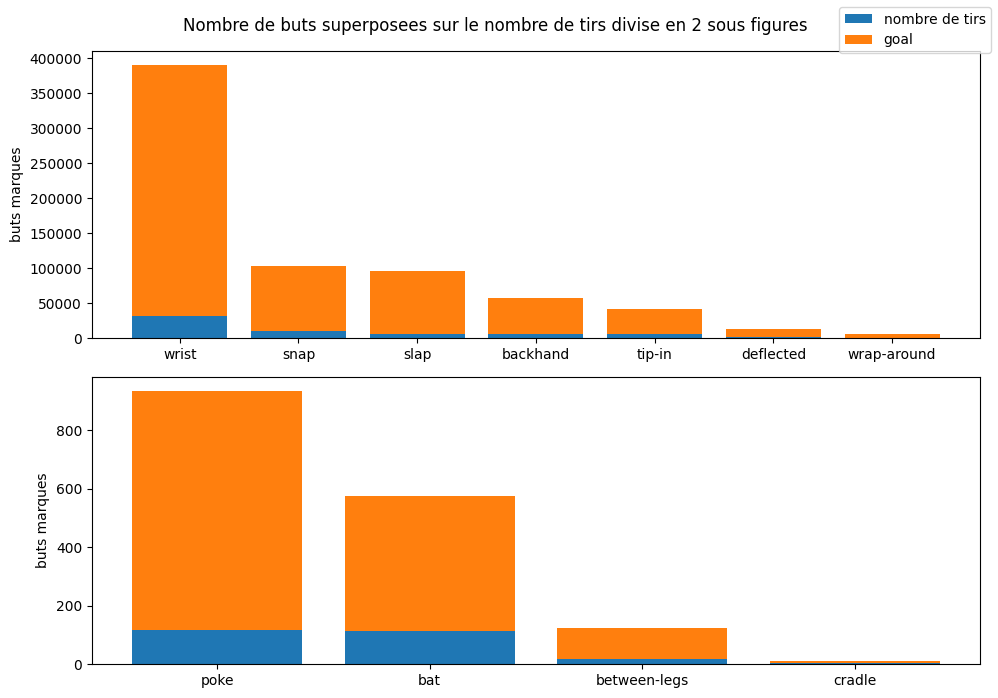

In [704]:
firsthalfshots = list(total_shots.values())[:len(total_shots)//2 + 2]
secondhalfshots = list(total_shots.values())[len(total_shots)//2 +2:]
firstgoals = list(goals.values())[:len(goals)//2 + 2]
secondgoals = list(goals.values())[len(goals)//2 +2:]

fig, ax = plt.subplots(2, figsize=(10, 7))
space1 = np.arange(len(firsthalfshots))
space2 = np.arange(len(secondhalfshots))

ax[0].bar(space1, firsthalfshots,label="nombre de tirs")
ax[0].bar(space1, firsthalfshots, bottom=firstgoals,label='goal')
ax[1].bar(space2, secondhalfshots)
ax[1].bar(space2, secondhalfshots, bottom=secondgoals)
ax[0].set_ylabel('buts marques')
ax[1].set_ylabel('buts marques')
fig.suptitle('Nombre de buts superposees sur le nombre de tirs divise en 2 sous figures')

ax[0].set_xticks(space1, list(total_shots.keys())[:len(total_shots)//2 + 2])
ax[1].set_xticks(space2, list(total_shots.keys())[len(total_shots)//2 +2:])
fig.legend()
plt.tight_layout()
plt.show()


Relation distance but


In [261]:
def goaldistance(x):
    """Retourne la distance euclidienne entre des coordonnees (x,y) et le but

    Args:
        x (np.array): (x,y)

    Returns:
        _type_: float
    """
    if x[0] >= 0: #Verifie si le x est superieur a 0, base le tir sur ca 
        return np.linalg.norm(np.array(x) - np.array([89, 0]))
    else:
        return np.linalg.norm(np.array(x) - np.array([-89, 0]))

df['distance'] = df[['x', 'y']].apply(lambda x: goaldistance(x), axis=1)


C:\Users\yahra\AppData\Local\Temp\ipykernel_25328\2212446621.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [433]:
import pandas as pd
bins=np.arange(0,100,10)
df['distance_bins'] = pd.cut(df['distance'], bins=bins)
goal_ratio = df.groupby(['season', 'distance_bins'])['goal'].mean().reset_index()
goal_ratio[goal_ratio['season']==20182019]['goal']

C:\Users\yahra\AppData\Local\Temp\ipykernel_25328\2720576992.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

C:\Users\yahra\AppData\Local\Temp\ipykernel_25328\1888981014.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



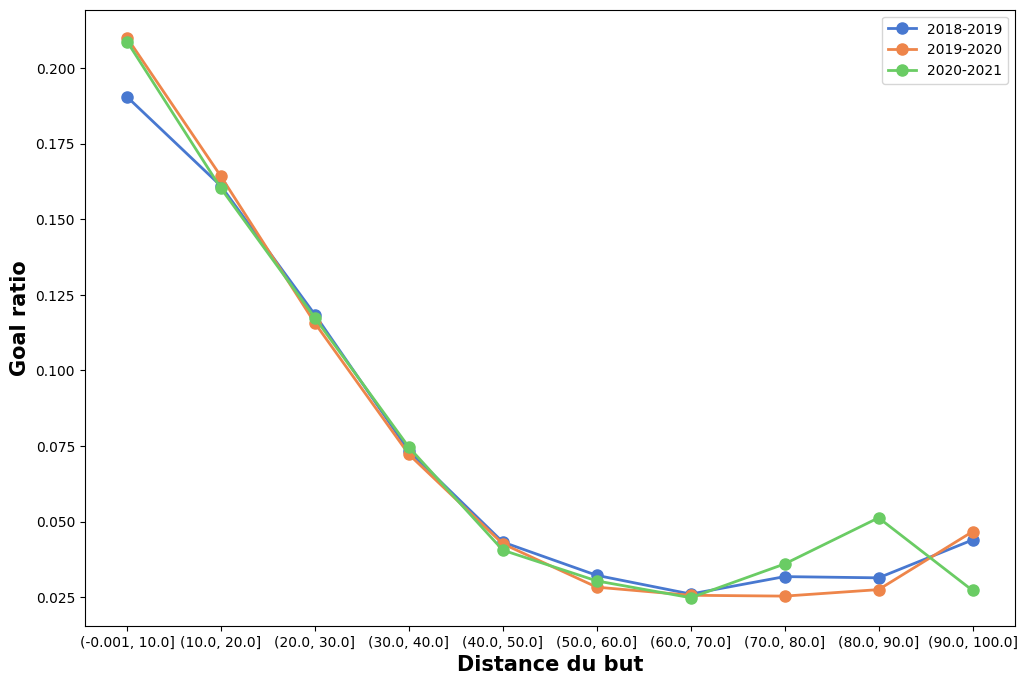

In [745]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
bins=np.arange(0,110,10)
df['distance_bins'] = pd.cut(df['distance'], bins=bins,include_lowest=True,right=True)
goal_ratio = df.groupby(['season', 'distance_bins'])['goal'].mean().reset_index()
fig,ax = plt.subplots(figsize =(12, 8)) 
colors = sns.color_palette("muted")  
#IL partage l'index X et les labels de distance
index_plot=goal_ratio[goal_ratio['season']==20182019]['goal'].index
label_distance=goal_ratio[goal_ratio['season']==20182019]['distance_bins']
ax.plot(index_plot,goal_ratio[goal_ratio['season']==20182019]['goal'],color =colors[0], marker='o', linewidth=2, markersize=8, label='2018-2019') 
ax.plot(index_plot,goal_ratio[goal_ratio['season']==20192020]['goal'],color =colors[1], marker='o', linewidth=2, markersize=8, label='2019-2020') 
ax.plot(index_plot,goal_ratio[goal_ratio['season']==20202021]['goal'],color =colors[2], marker='o', linewidth=2, markersize=8, label='2020-2021') 

# Ticks  
plt.xlabel('Distance du but', fontweight ='bold', fontsize = 15) 
plt.ylabel('Goal ratio', fontweight ='bold', fontsize = 15) 
plt.xticks(index_plot, label_distance )
plt.legend()
plt.show() 

C:\Users\yahra\AppData\Local\Temp\ipykernel_25328\473329034.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



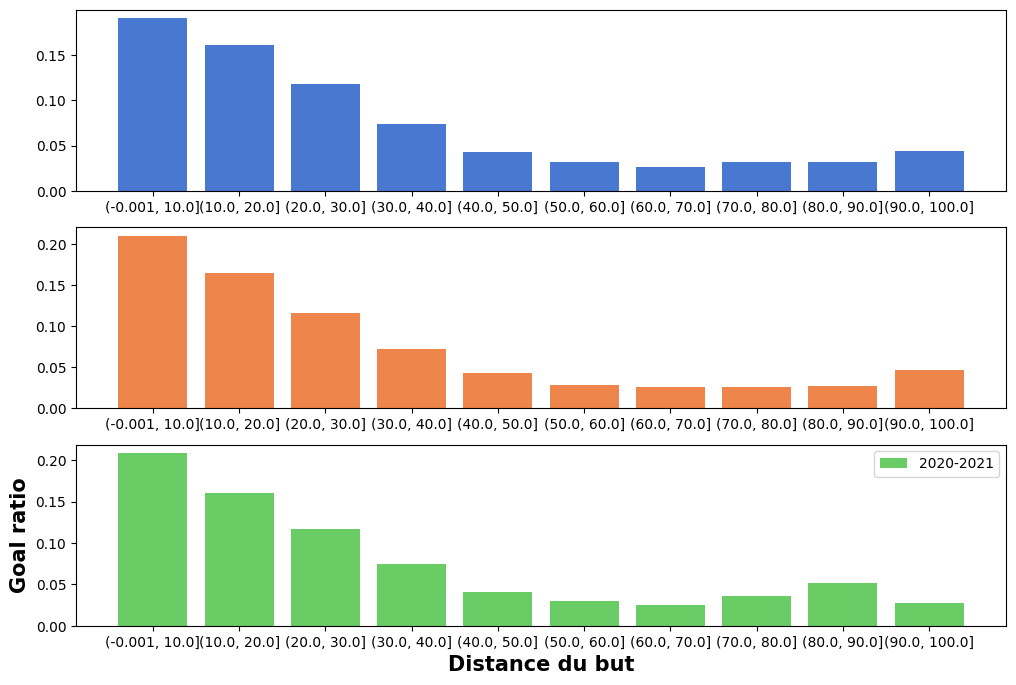

In [744]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
bins=np.arange(0,110,10)
#On decoupe la distance en 10 categories 
df['distance_bins'] = pd.cut(df['distance'], bins=bins,include_lowest=True,right=True)

#On regroupe par saison et categorie de distance puis on fait la moyenne de goal ( vu que goal est un bool ca devrait donner le ratio (Source: GPT4))
goal_ratio = df.groupby(['season', 'distance_bins'])['goal'].mean().reset_index()
fig,ax = plt.subplots(3,figsize =(12, 8)) 

colors = sns.color_palette("muted")  
index_bar=goal_ratio[goal_ratio['season']==20182019]['goal'].index
label_distance=goal_ratio[goal_ratio['season']==20182019]['distance_bins']
ax[0].bar(index_bar,goal_ratio[goal_ratio['season']==20182019]['goal'],color =colors[0], label='2018-2019') 
ax[1].bar(index_bar,goal_ratio[goal_ratio['season']==20192020]['goal'],color =colors[1], label='2019-2020') 
ax[2].bar(index_bar,goal_ratio[goal_ratio['season']==20202021]['goal'],color =colors[2], label='2020-2021')


# Ticks  
plt.xlabel('Distance du but', fontweight ='bold', fontsize = 15) 
plt.ylabel('Goal ratio', fontweight ='bold', fontsize = 15) 
ax[0].set_xticks(index_bar, label_distance )
ax[1].set_xticks(index_bar,  label_distance)
ax[2].set_xticks(index_bar,  label_distance)
plt.legend()
plt.show() 

In [743]:
goal_ratio[goal_ratio['season']==20182019].index

Index([20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype='int64')

In [523]:
df[(df['distance'] < 100) & (df['distance'] >= 90) & (df['goal'] == 1) & (df['season'] == 20202021)]

,season,gameId,eventId,period,timeInPeriod,eventType,teamId,shooter,goalie,shotType,...,emptyNetHome,powerplayHome,powerplayAway,coordinates,result,x,y,distance,goal,distance_bins
332055,20202021,2020020077,617,3,18:12,goal,29,Eric Robinson,None,wrist,...,False,False,True,"(1, 34)",goal,1.0,34.0,94.339811,1,"(90.0, 100.0]"
349082,20202021,2020020358,674,3,17:50,goal,52,Blake Wheeler,None,wrist,...,False,False,True,"(-3, 31)",goal,-3.0,31.0,91.416629,1,"(90.0, 100.0]"
364992,20202021,2020020621,523,3,19:59,goal,22,Leon Draisaitl,None,wrist,...,True,True,False,"(5, -36)",goal,5.0,-36.0,91.389277,1,"(90.0, 100.0]"
374479,20202021,2020020779,764,3,18:41,goal,54,Jonathan Marchessault,None,snap,...,False,False,True,"(-4, -32)",goal,-4.0,-32.0,90.824006,1,"(90.0, 100.0]"
376804,20202021,2020020818,756,3,19:51,goal,19,Ryan O'Reilly,None,backhand,...,False,False,True,"(-2, -31)",goal,-2.0,-31.0,92.357999,1,"(90.0, 100.0]"
377347,20202021,2020020827,606,3,17:23,goal,12,Martin Necas,None,backhand,...,False,False,True,"(0, -24)",goal,0.0,-24.0,92.179173,1,"(90.0, 100.0]"


Premiere version avant que je decouvre pd.cut 


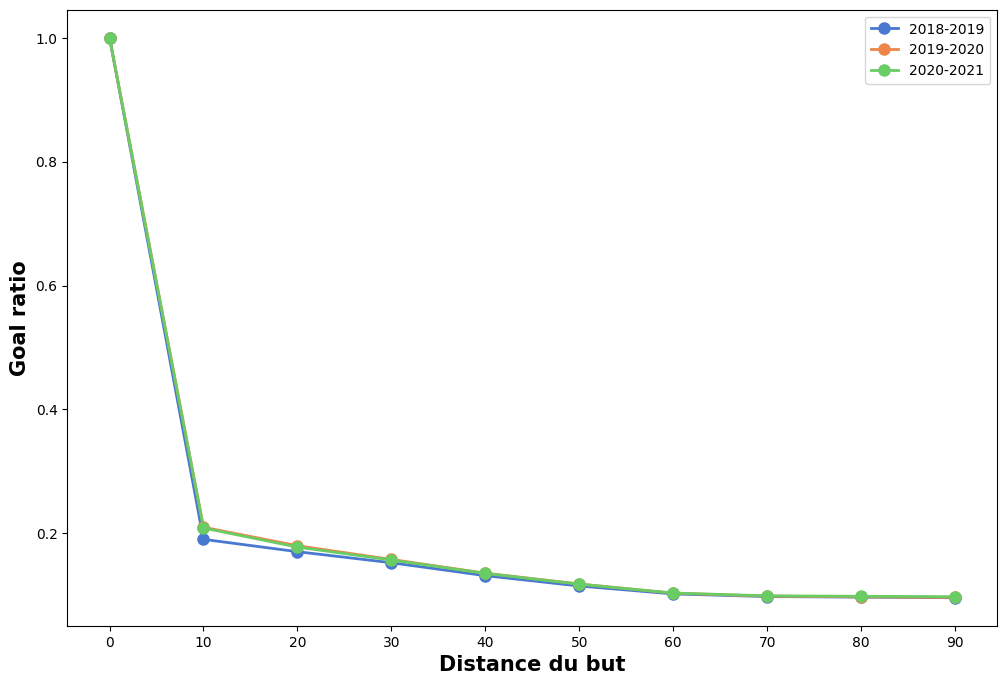

In [717]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
bins = np.arange(0, 100, 10)
seasons = [20182019, 20192020, 20202021]
ratio = {}

for season in seasons:
    ratio[season] = {}
    for i in bins:
        total = len(df[(df['distance'] <= i) & (df['season'] == season)])
        if total > 0:
            goals = len(df[(df['distance'] <= i) & (df['result'] == 'goal') & (df['season'] == season)])
            ratio[season][i] = goals / total
        else:
            ratio[season][i] = 1

fig,ax = plt.subplots(figsize =(12, 8)) 
# Set position of bar on X axis 
barWidth=0.3
colors = sns.color_palette("muted")  
# plot
index_ratio=ratio[20182019].keys()
ax.plot(index_ratio,ratio[20182019].values(),color =colors[0], marker='o', linewidth=2, markersize=8, label='2018-2019') 
ax.plot(index_ratio,ratio[20192020].values(),color =colors[1], marker='o', linewidth=2, markersize=8, label='2019-2020') 
ax.plot(index_ratio,ratio[20202021].values(),color =colors[2], marker='o', linewidth=2, markersize=8, label='2020-2021') 

# Ticks  
plt.xlabel('Distance du but', fontweight ='bold', fontsize = 15) 
plt.ylabel('Goal ratio', fontweight ='bold', fontsize = 15) 
plt.xticks([i for i in index_ratio],[str(i) for i in index_ratio])
plt.legend()
plt.show() 

J'ai essaye avec qcut

C:\Users\yahra\AppData\Local\Temp\ipykernel_25328\2659110703.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



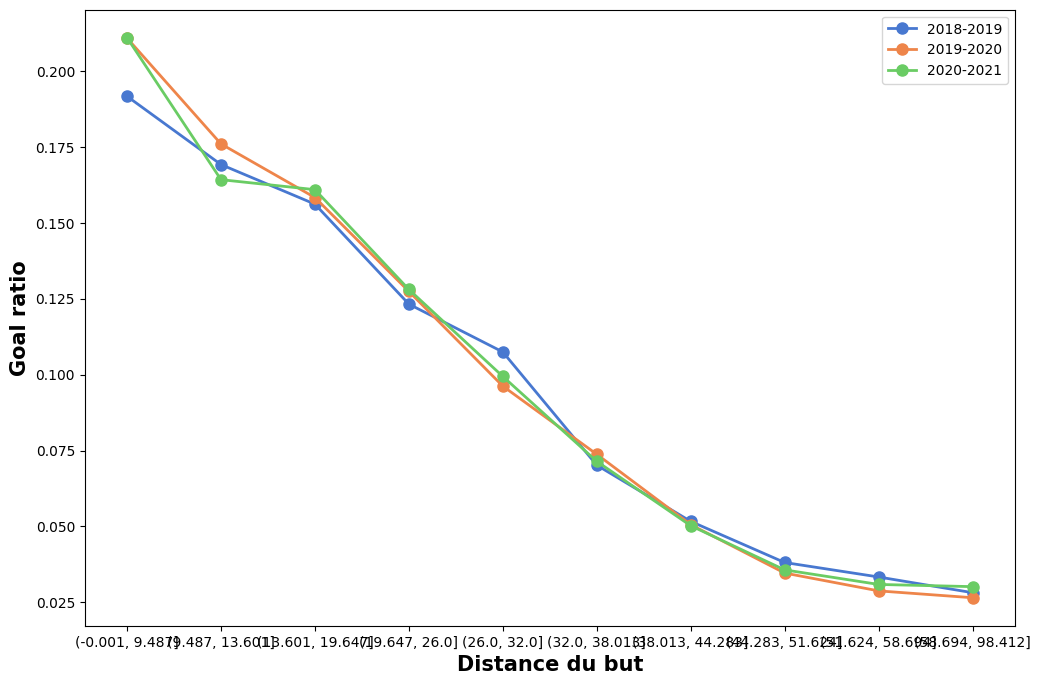

In [614]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
bins=np.arange(0,110,10)
df['distance_bins'] = pd.qcut(df['distance'], q=10)
goal_ratio = df.groupby(['season', 'distance_bins'])['goal'].mean().reset_index()
fig,ax = plt.subplots(figsize =(12, 8)) 
# Set position of bar on X axis 
barWidth=0.3
colors = sns.color_palette("muted")  
# plot
index_goal=goal_ratio[goal_ratio['season']==20182019]['goal'].index
ax.plot(index_goal,goal_ratio[goal_ratio['season']==20182019]['goal'],color =colors[0], marker='o', linewidth=2, markersize=8, label='2018-2019') 
ax.plot(index_goal,goal_ratio[goal_ratio['season']==20192020]['goal'],color =colors[1], marker='o', linewidth=2, markersize=8, label='2019-2020') 
ax.plot(index_goal,goal_ratio[goal_ratio['season']==20202021]['goal'],color =colors[2], marker='o', linewidth=2, markersize=8, label='2020-2021') 

# Ticks  
plt.xlabel('Distance du but', fontweight ='bold', fontsize = 15) 
plt.ylabel('Goal ratio', fontweight ='bold', fontsize = 15) 
plt.xticks(goal_ratio[goal_ratio['season']==20182019]['goal'].index,  goal_ratio[goal_ratio['season']==20182019]['distance_bins'])
plt.legend()
plt.show() 

Question 3 : Heatmap


In [673]:
#Ratio des goals par rapport a la distance et au type de tir
heat=df.groupby(['distance_bins','shotType'])['goal'].mean().reset_index()
heat['goal']=heat['goal']*100
#PIvot pour le heatmap
df_heat=heat.pivot_table(values='goal',index='shotType',columns='distance_bins')
df_heat.fillna(0,inplace=True)

C:\Users\yahra\AppData\Local\Temp\ipykernel_25328\154773117.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\yahra\AppData\Local\Temp\ipykernel_25328\154773117.py:3: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



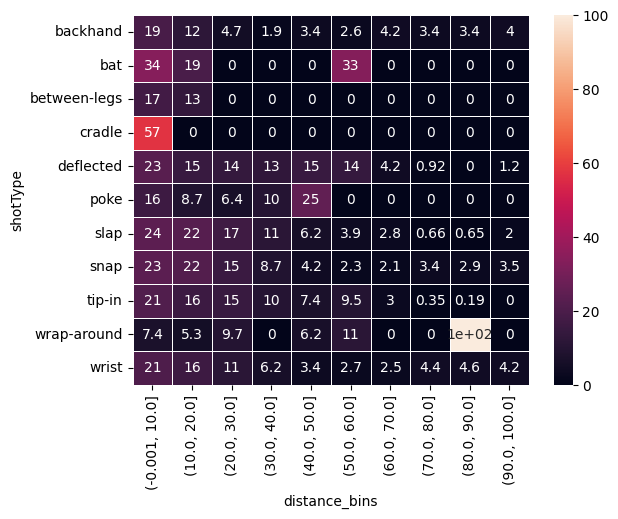

In [676]:
import seaborn as sns
ax=sns.heatmap(df_heat,annot=True,linewidths=0.5)